In [1]:
import os

import graphviz
import pandas as pd
import jax.numpy as jnp

import appletree as apt
from appletree.utils import get_file_path

from IPython.display import SVG, display

In [2]:
apt.set_gpu_memory_usage(0.2)

In [3]:
data = pd.read_csv(get_file_path('data_Rn220.csv'))
bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[1e2, 1e4],
    which_np=jnp
)

In [4]:
er = apt.ERBand(bins=[bins_cs1, bins_cs2], bins_type='irreg')

In [5]:
er.deduce(
    data_names=['cs1', 'cs2'], 
    func_name='er_simulate'
)

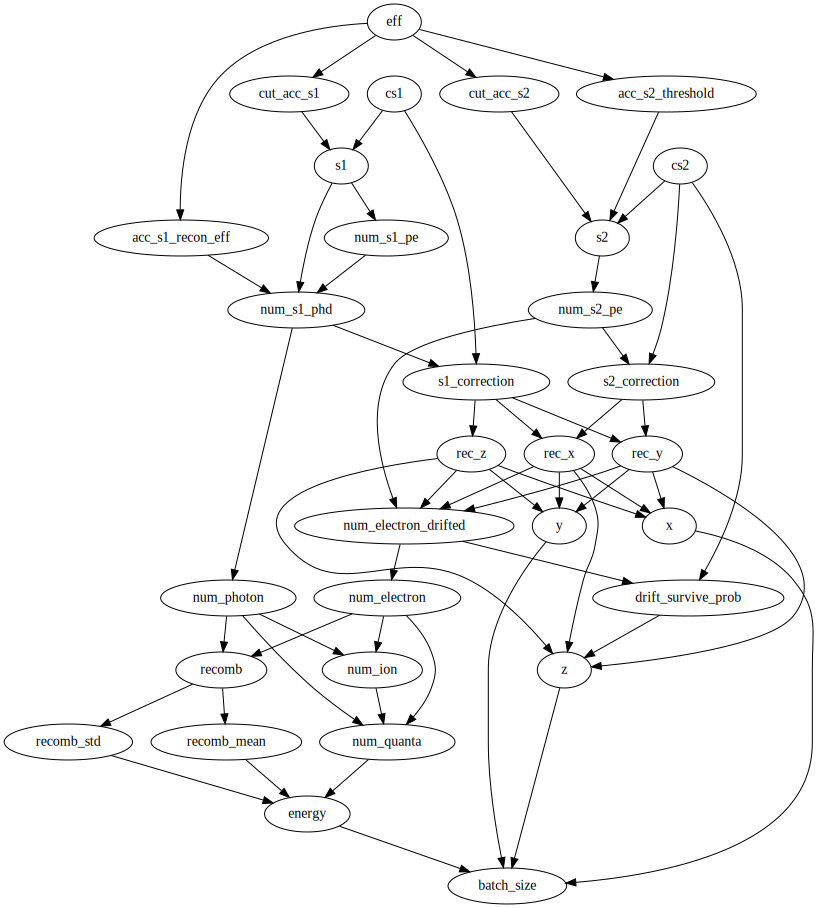

In [6]:
graph_tree = graphviz.Digraph(format='svg', strict=True)
_ = apt.add_deps_to_graph_tree(er, graph_tree)
_ = apt.tree_to_svg(graph_tree, 'er_dtypes')
display(SVG('er_dtypes.svg'))

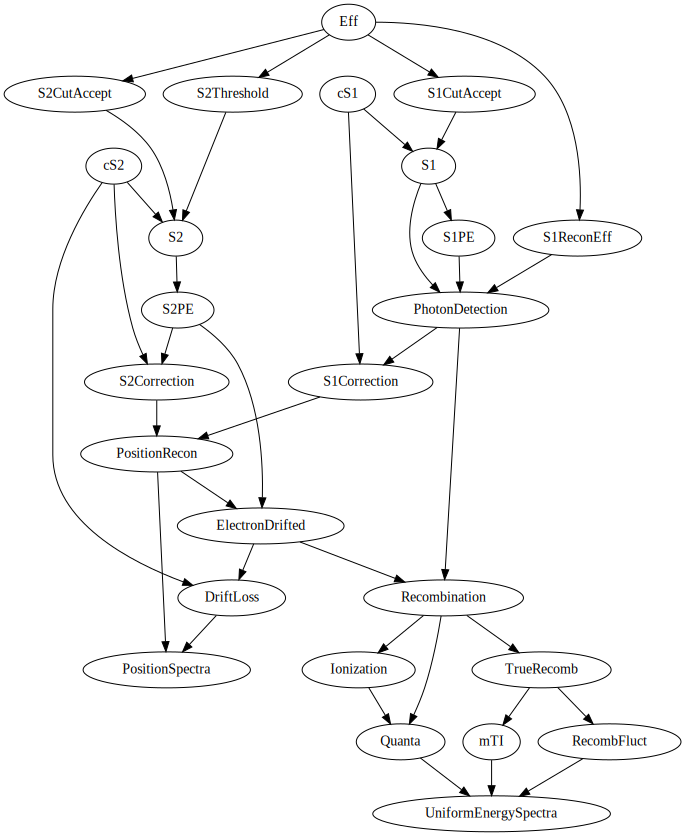

In [7]:
graph_tree = graphviz.Digraph(format='svg', strict=True)
_ = apt.add_plugins_to_graph_tree(er, graph_tree)
_ = apt.tree_to_svg(graph_tree, 'er_plugins')
display(SVG('er_plugins.svg'))

In [8]:
data = pd.read_csv(get_file_path('data_Neutron.csv'))
bins_num_s1_phd, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['num_s1_phd', 'cs2']].to_numpy(),
    [8, 10],
    order=[0, 1],
    x_clip=[1.5, 9.5],
    y_clip=[1e2, 1e3],
    which_np=jnp
)

In [9]:
nr = apt.NRBand(bins=[bins_num_s1_phd, bins_cs2], bins_type='irreg')

In [10]:
nr.deduce(
    data_names=['num_s1_phd', 'cs2'], 
    func_name='nr_simulate'
)

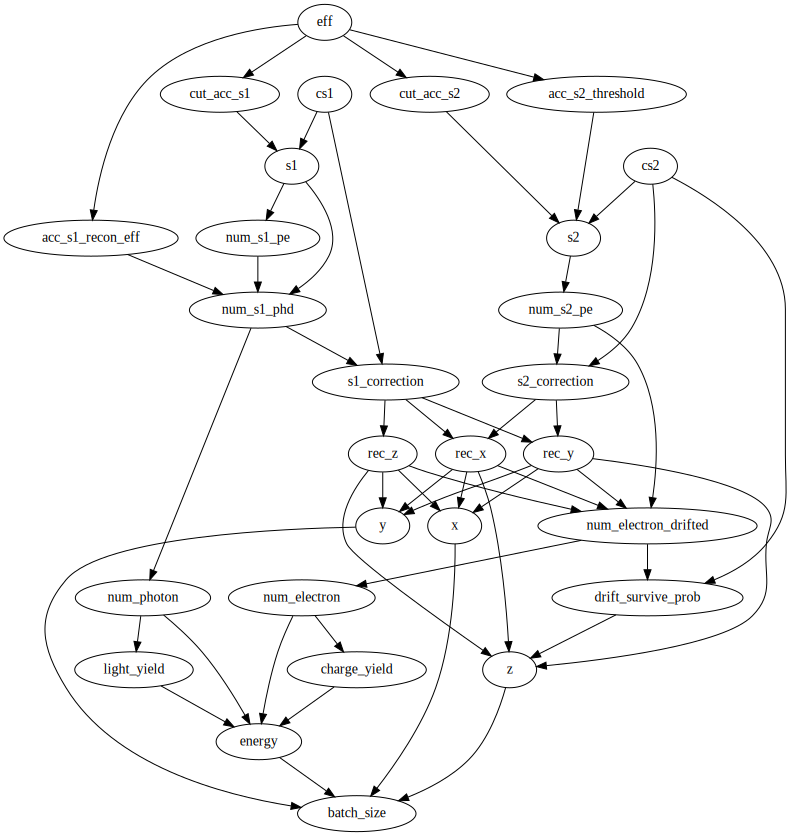

In [11]:
graph_tree = graphviz.Digraph(format='svg', strict=True)
_ = apt.add_deps_to_graph_tree(nr, graph_tree)
_ = apt.tree_to_svg(graph_tree, 'nr_dtypes')
display(SVG('nr_dtypes.svg'))

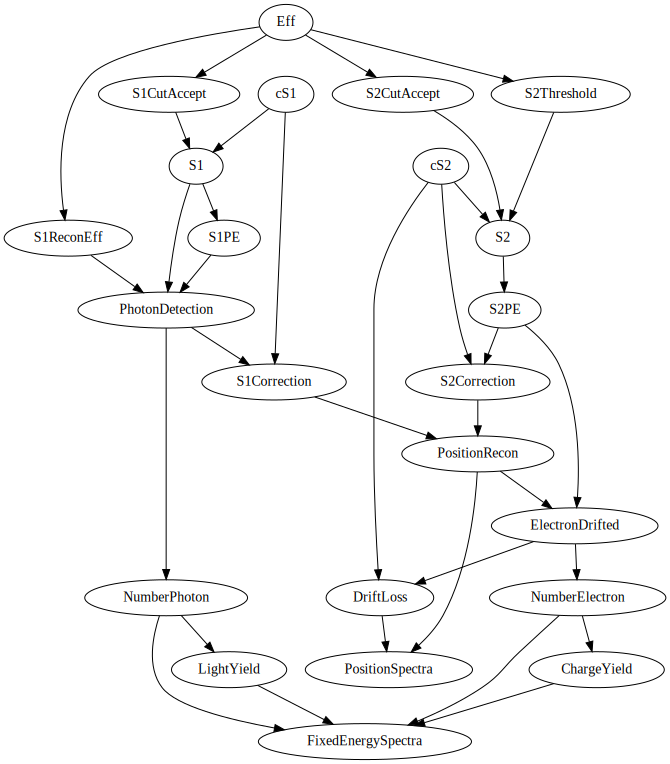

In [12]:
graph_tree = graphviz.Digraph(format='svg', strict=True)
_ = apt.add_plugins_to_graph_tree(nr, graph_tree)
_ = apt.tree_to_svg(graph_tree, 'nr_plugins')
display(SVG('nr_plugins.svg'))